In [5]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [6]:
env = BlackjackEnv()

In [29]:
# set returns  a uniqe array
print(set([1,2,3,3,4]))

# defaultdict is just a dict with a default type
l = defaultdict(float)
print(l['nonexistantkey'])


{1, 2, 3, 4}
0.0


In [2]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    for i in range(num_episodes):
        state = env.reset()
        episode = []
        while True:
            action = policy(state)
            next_state, reward, done, _  = env.step(action)
            # For each step in the episode, we save:
            #             the previous state (state at the begining of the step)
            #             the action that was taken, and the immediate reward
            # #           however the action information is never used in MC Prediction
            #             because we have a deterministic policy we are predicting
            episode.append((state, action, reward))
            if done:
                break
            state = next_state
            
        # when the episode finishes
        unique_states = set([x[0] for x in episode])
        for s in unique_states:
            first_time_idx = np.argmax([x[0]==s for x in episode])
            # correct if appears OR is false gives 0: so then s never happened move to next s
            if (s!=episode[0][0]) & (first_time_idx==0):
                break
            G = np.sum([stage[2]*(discount_factor**i) for i, stage in enumerate(episode[first_time_idx:])])
            returns_sum[s] += G
            returns_count[s] += 1.0
            # V keeps running itself over with updated statistic
            V[s] = returns_sum[s]/returns_count[s]
        
    # Implement this!

    return V    

In [3]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

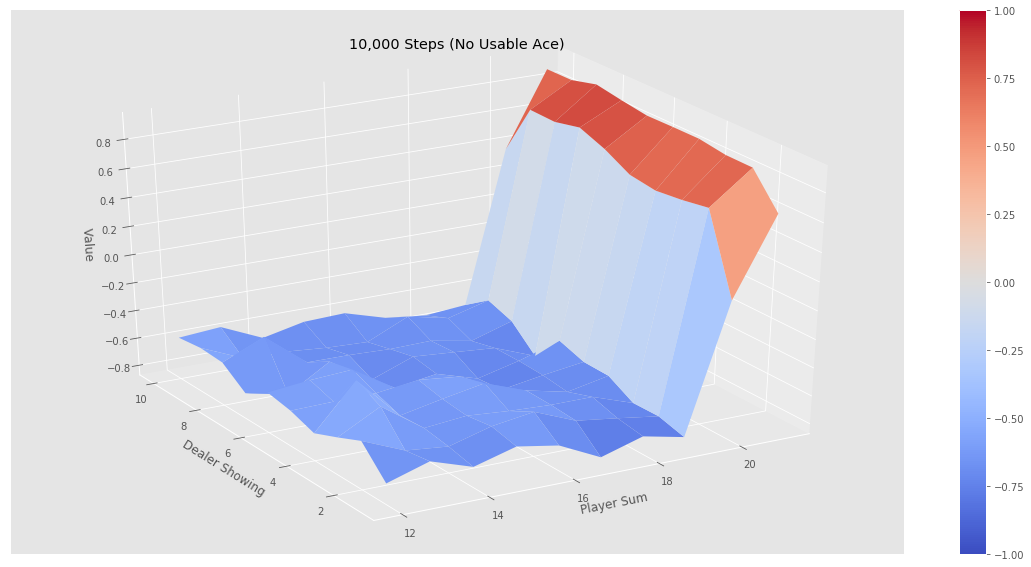

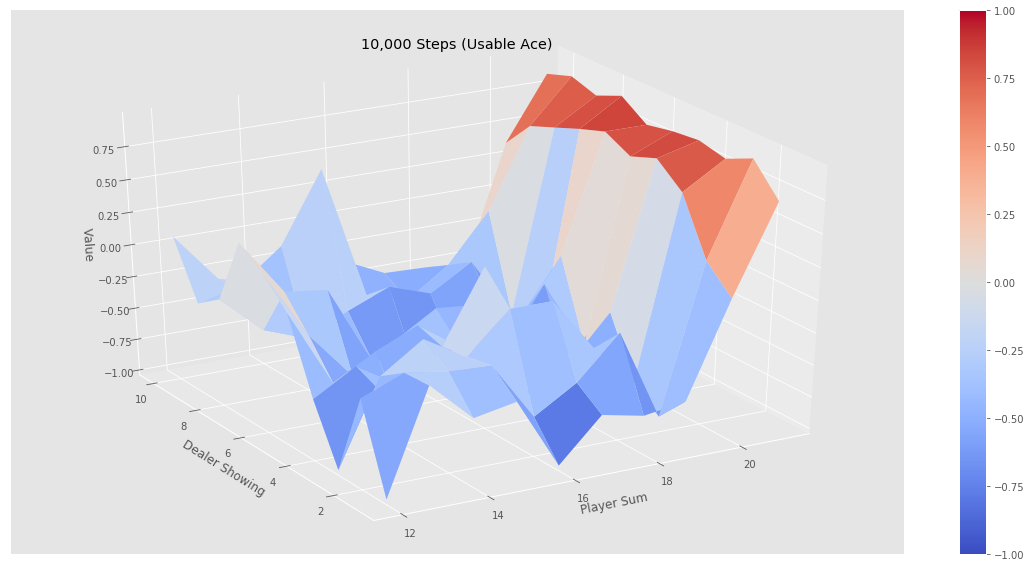

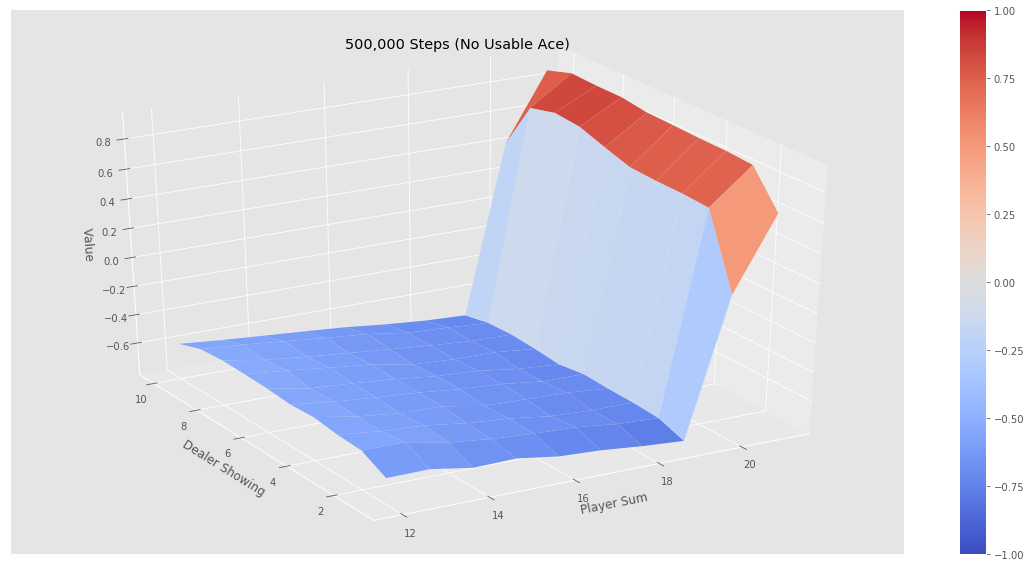

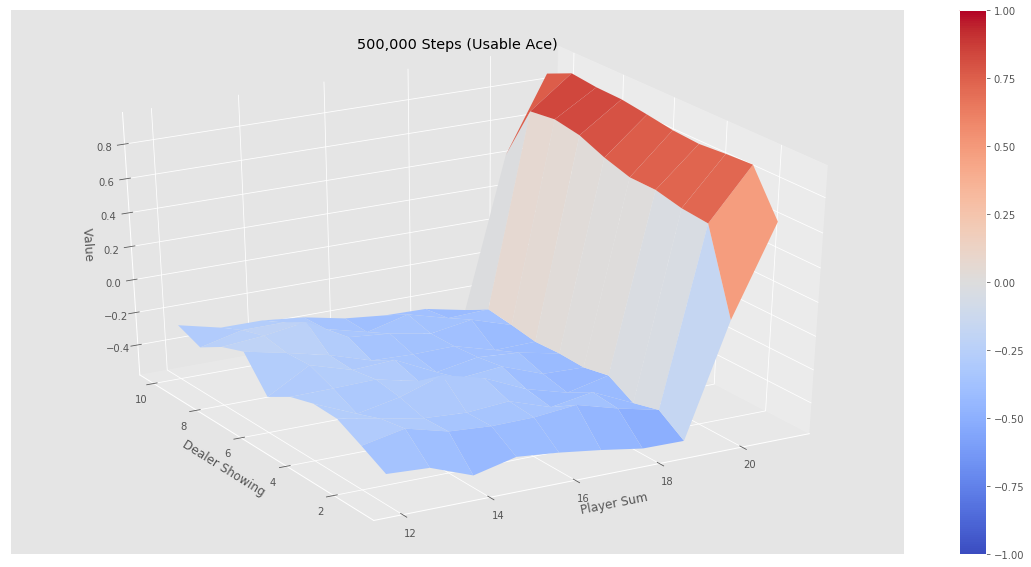

In [30]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")